### Kinematics of the double pendulum

#### Positions
$$x_1 = L_1 \sin \theta_1$$
$$y_1 = -L_1 \cos \theta_1$$
$$x_2 = x_1 + L_2 \sin \theta_2$$
$$y_2 = y_1 - L_2 \cos \theta_2$$

#### Velocities
$$\dot{x}_1 = \dot{\theta_1} L_1 \cos \theta_1$$
$$\dot{y_1} =  \dot{\theta_1} L_1 \sin \theta_1$$
$$\dot{x_2} = \dot{x_1} + \dot{\theta_2} L_2 \cos \theta_2$$
$$\dot{y_2} = \dot{y_1} + \dot{\theta_2} L_2 \sin \theta_2$$


#### Accelerations

$$\ddot{x}_1 = -\dot{\theta_1}^2 L_1 \sin \theta_1 + \ddot{\theta_1} L_1 \cos \theta_1$$
$$\ddot{y_1} =  \dot{\theta_1}^2 L_1 \cos \theta_1 + \ddot{\theta_1} L_1 \sin \theta_1$$
$$\ddot{x_2} = \ddot{x_1} - \dot{\theta_2}^2 L_2 \sin \theta_2 + \ddot{\theta_2} L_2 \cos \theta_2$$
$$\ddot{y_2} = \ddot{y_1} + \dot{\theta_2}^2 L_2 \cos \theta_2 + \ddot{\theta_2} L_2 \sin \theta_2$$

#### Energies
Let $v_1^2 = \dot{x_1}^2 +\dot{y_1}^2$ and $v_2^2 = \dot{x_2}^2 +\dot{y_2}^2$ then the kinetic energies $T_1$ and $T_2$ are
$$ T_1 = \frac{1}{2}m_1 v_1^2 = \frac{1}{2}m_1 L_1^2 \dot{\theta_1}^2 $$
$$ T_2 = \frac{1}{2}m_2 v_2^2 = \frac{1}{2}m_2 \left( L_1^2 \dot{\theta_1}^2 + L_2^2 \dot{\theta_2}^2 + 2L_1 L_2 \cos(\theta_1-\theta_2) \dot{\theta_1} \dot{\theta_2} \right) $$

The potential enrgies are
$$V_1 = m_1 g y_1 = - m_1 g L_1 \cos \theta_1$$
$$V_2 = m_2 g y_2 = -m_2 g ( L_1 \cos \theta_1 + L_2 \cos \theta_2)$$

#### Langrangian
Now we form the Lagrangian $L=T-V=T_1+T_2 -V_1 -V_2$ and use the Euler-Lagrange equations:
$$\frac{\partial L}{\partial \theta_1} = \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta_1}}$$
$$\frac{\partial L}{\partial \theta_2} = \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta_2}}$$

Applying these gives
$$-(m_1+m_2) g L_1 \sin \theta_1 = (m_1+m_2) L_1^2 \ddot{\theta_1} + m_2 L_1 L_2 \sin(\theta_1-\theta_2) \dot{\theta_2}^2 +  m_2 L_1 L_2 \cos(\theta_1-\theta_2) \ddot{\theta_2} $$
and
$$ -m_2 g L_2 \sin \theta_2 = m_2 L_2 \ddot{\theta_2} + m_2 L_1 L_2 \cos(\theta_1-\theta_2) \ddot{\theta_1} + m_2 L_1 L_2 \sin(\theta_1-\theta_2) \dot{\theta_1}^2 $$


#### Equations of motions
$$ \omega_1 = \dot{\theta_1}$$  

$$ \omega_2 = \dot{\theta_2}$$
$$ \ddot\theta_1 = \frac{1}{L_1\xi}\left[L_1m_2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\omega_1^2 + L_2m_2\sin(\theta_1-\theta_2)\omega_2^2 - m_2g\cos(\theta_1-\theta_2)\sin(\theta_2) + (m_1+m_2)g\sin(\theta_1) \right] $$
$$ \ddot\theta_2 = \frac{1}{L_2\xi}\left[L_2m_2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\omega_2^2 + L_1(m_1+m_2)\sin(\theta_1-\theta_2)\omega_1^2+(m_1+m_2)g\sin(\theta_1)\cos(\theta_1-\theta_2) - (m_1+m_2)g\sin(\theta_2) \right] $$
where
$$\xi \equiv \cos^2(\theta_1-\theta_2)m_2-m_1-m_2$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch



In [ ]:
def rhs(t, z, L1, L2, m1, m2, g):
    """
    Returns the right-hand side of the ordinary differential equation describing the double pendulem
    """
    theta1, w1, theta2, w2 = z    #The four components
    cos12 = np.cos(theta1 - theta2)
    sin12 = np.sin(theta1 - theta2)
    sin1 = np.sin(theta1)
    sin2 = np.sin(theta2)
    xi = cos12**2*m2 - m1 - m2
    w1dot = ( L1*m2*cos12*sin12*w1**2 + L2*m2*sin12*w2**2
            - m2*g*cos12*sin2      + (m1 + m2)*g*sin1)/(L1*xi)
    w2dot = -( L2*m2*cos12*sin12*w2**2 + L1*(m1 + m2)*sin12*w1**2
            + (m1 + m2)*g*sin1*cos12  - (m1 + m2)*g*sin2 )/(L2*xi)
    return w1, w1dot, w2, w2dot   #Return the w's and the wdot's


def to_cartesian(theta1, w1, theta2, w2, L1, L2):
    """ Transforms theta and omega to cartesian coordinates
    and velocities x1, y1, x2, y2, vx1, vy1, vx2, vy2
    """
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)
    vx1 = L1*np.cos(theta1)*w1
    vy1 = L1*np.sin(theta1)*w1
    vx2 = vx1 + L2*np.cos(theta2)*w2
    vy2 = vy1 + L2*np.sin(theta2)*w2
    return x1, y1, x2, y2, vx1, vy1, vx2, vy2


In [ ]:
# Set up the initial conditions. Here we have lengths and masses
L1, L2 = 1., 1.
m1, m2 = 3., 1.
g = 9.81     # [m/s^2]. Gravitational acceleration

#Starting angles
z0=[np.pi/4,0,np.pi/4,0]
#z0=[0.1,0,0.1,0]

#Time ranges
tmax, dt = 50, 0.1
t = np.arange(0, tmax+dt, dt)

In [ ]:
# Solve initial value problem
ret = solve_ivp(rhs, (0,tmax), z0, t_eval=t, args=(L1, L2, m1, m2, g))
z=ret.y
print(np.shape(z))

# Extract result
theta1, w1, theta2, w2 = z[0], z[1], z[2], z[3]
x1, y1, x2, y2, vx1, vy1, vx2, vy2 = to_cartesian(theta1, w1, theta2, w2, L1, L2)

(4, 501)


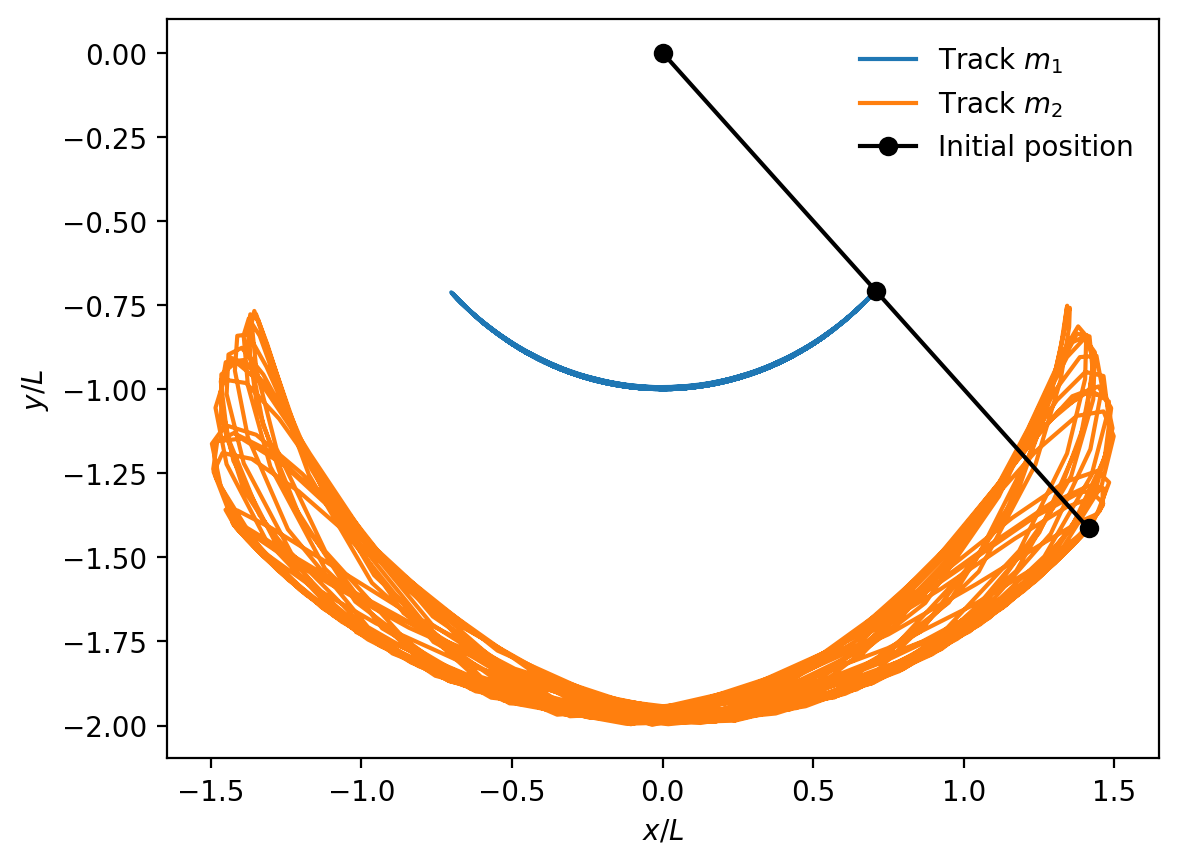

In [ ]:
fig,ax=plt.subplots()
ax.plot(x1, y1, label=r"Track $m_1$")
ax.plot(x2, y2, label=r"Track $m_2$")
ax.plot([0, x1[0], x2[0]], [0, y1[0], y2[0]], "-o", label="Initial position", c='k')
plt.ylabel(r"$y/L$")
plt.xlabel(r"$x/L$")
ax.legend()

## 1. Designing a recurrent neural network to predict the future positions, where future is defined as $t=t_0 + 20 \delta t$, of the masses $m_1$ and $m_2$ using their cartesian coordinates and the initial conditions  $z_0=[\pi/4,0,\pi/4,0]$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import tensorflow as tf
import keras
import keras.layers as layers
from sklearn.model_selection import train_test_split


In [ ]:
def PenSolve(t, z0, L1, L2, m1, m2, g):
  """Solves the ODE and converts to cartesian coordinates
  Inputs: time,t
          inital state vector, z0 = [theta1, omega1, theta2, omega2]
          length of pendulums, L1 L2
          masses of pendulums, m1 m2
          gravitational acceleration, g
  Returns: the cartesian coordinate solutions for velocity and position of masses 1 and 2"""
  ret = solve_ivp(rhs, (0,tmax), z0, t_eval=t, args=(L1, L2, m1, m2, g))  #solving ODE
  z=ret.y   #storing solutions in 4xN array
  theta1, w1, theta2, w2 = z[0], z[1], z[2], z[3]   #extracting results
  x1, y1, x2, y2, vx1, vy1, vx2, vy2 = to_cartesian(theta1, w1, theta2, w2, L1, L2)   #converting to cartesian
  return x1, y1, x2, y2, vx1, vy1, vx2, vy2

def shapeArray(data,windowsize,offset):
  """Splits up a 1D array of data into a series of overlapping windows for network training (from Week6_Prediction.ipynb)
  Input: 1D array, data
          number of 'window' samples to train our network, windowsize
          step number of samples in the future to predict, offset
  Return: tuple of the array of input windows and target windows"""
  input= np.array([data[i : i + windowsize] for i in range(len(data)-(windowsize+offset)+1)])  #creates array of overlapping input windows
  target= np.array([data[i +windowsize : i+ windowsize+offset] for i in range(len(data)-(windowsize+offset)+1)])  #creates array of target windows
  return (input,target)



In [ ]:
#parameters
z0 = [np.pi/4, 0, np.pi/4, 0]  # Initial state
t_span = (0,20) #max& min time
dt=0.1
t_eval = np.arange(t_span[0], t_span[1]+dt, dt)   #array of time steps
windowsize = 50   #number of samples
offset = 20   #predicting 20*dt in the future

def trainModel(t_eval, z0, L1, L2, m1, m2, g, windowsize, offset):
  #creating train amd test arrays
  x1, y1, x2, y2, vx1, vy1, vx2, vy2 = PenSolve(t_eval, z0, L1, L2, m1, m2, g)  #solving ODE
  x1input, x1label = shapeArray(x1, windowsize, offset)   #creating input & target windows
  x2input, x2label = shapeArray(x2, windowsize, offset)
  y1input, y1label = shapeArray(y1, windowsize, offset)
  y2input, y2label = shapeArray(y2, windowsize, offset)
  input_data = np.zeros((x1input.shape[0], x1input.shape[1], 4))  #initialising the input array
  input_data[:, :, 0] = x1input   #extracting corresponding x,y positions
  input_data[:, :, 1] = x2input
  input_data[:, :, 2] = y1input
  input_data[:, :, 3] = y2input
  target_data = np.zeros((x1label.shape[0], x1label.shape[1], 4))  # #initialising the target array
  target_data[:, :, 0] = x1label  #extracting corresponding x,y positions
  target_data[:, :, 1] = x2label
  target_data[:, :, 2] = y1label
  target_data[:, :, 3] = y2label
  #split into training and testing data
  train_data, test_data, train_label, test_label = train_test_split(input_data, target_data, test_size=0.25, shuffle=True, random_state=42)
  #compliling model
  model = keras.models.Sequential()
  model.add(keras.layers.Input(shape=(None, 4)))  #input shape =4
  model.add(keras.layers.LSTM(16, return_sequences=True))  # LSTM layer with 16 neurons
  model.add(keras.layers.LSTM(8, activation='relu'))  # outputs only the last step
  model.add(keras.layers.Dense(4*offset, activation="linear"))  # outputs 4 values per sample * offset
  model.add(layers.Reshape((offset,4))) #reshaping
  model.compile(loss='mean_squared_error', optimizer='adam')
  #train model
  history=model.fit(train_data,train_label,epochs=30,batch_size=16,verbose=1,validation_data=(test_data,test_label))
  return model, test_data, test_label

model, test_data, test_label = trainModel(t_eval, z0, L1, L2, m1, m2, g, windowsize, offset)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 289ms/step - loss: 1.1267 - val_loss: 1.1009
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 1.0977 - val_loss: 1.0632
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.0573 - val_loss: 1.0071
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.9970 - val_loss: 0.9207
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.9087 - val_loss: 0.8499
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.8373 - val_loss: 0.7713
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.7583 - val_loss: 0.6917
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.6822 - val_loss: 0.6203
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.6081 - val_loss: 0.5574
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.5451 - val_loss: 0.5128
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.4982 - val_loss: 0.4635
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.4467 - val_loss: 0.42

## 2. How stable is the network to variations in initial conditions?

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step


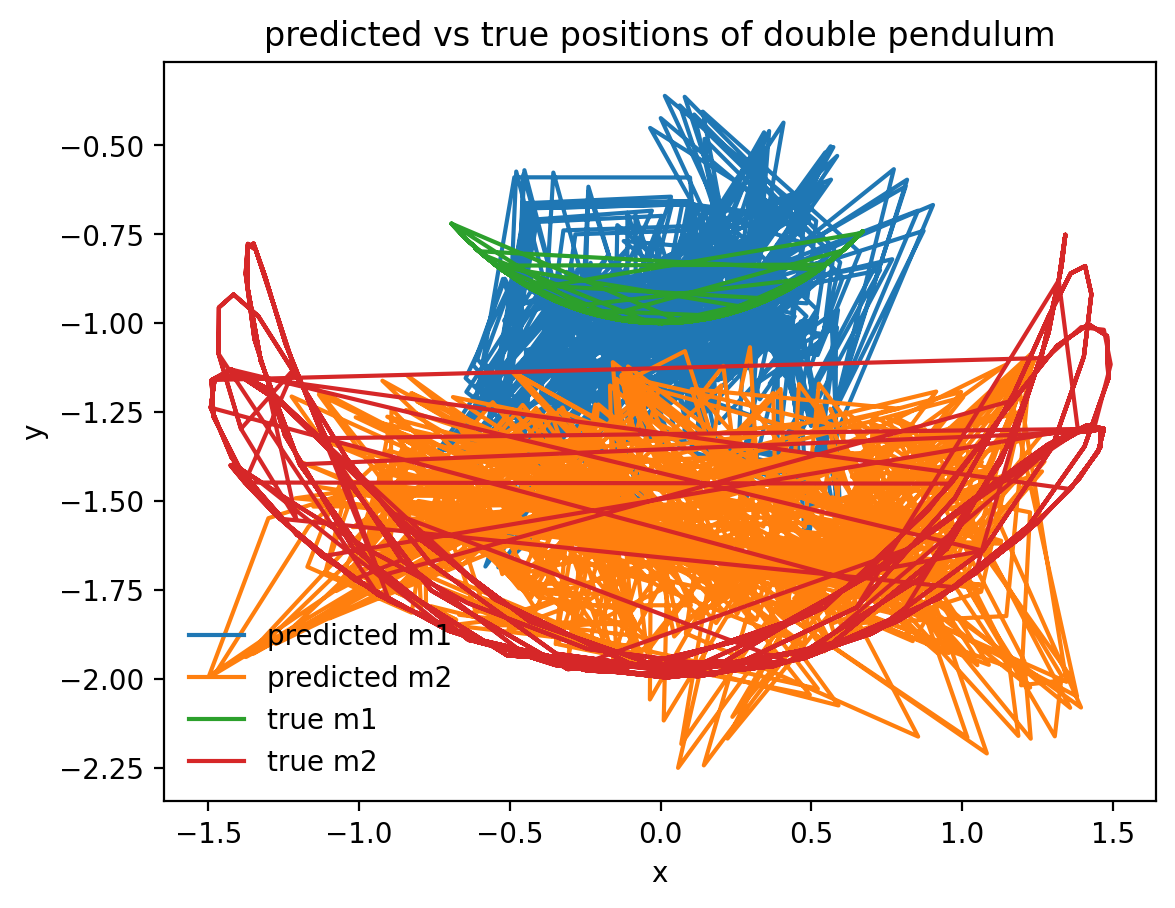

In [ ]:
test_predict = model.predict(test_data) #generating predictions using the model
#extracting the predicted paths
predicted_x1 = test_predict[:, :, 0].flatten()
predicted_x2 = test_predict[:, :, 1].flatten()
predicted_y1 = test_predict[:, :, 2].flatten()
predicted_y2 = test_predict[:, :, 3].flatten()
#extracting the actual paths from the test label data
true_x1 = test_label[:, :, 0].flatten()
true_x2 = test_label[:, :, 1].flatten()
true_y1 = test_label[:, :, 2].flatten()
true_y2 = test_label[:, :, 3].flatten()
#plotting results
plt.figure()
plt.plot(predicted_x1, predicted_y1, label='predicted m1')
plt.plot(predicted_x2, predicted_y2, label='predicted m2')
plt.plot(true_x1, true_y1, label='true m1')
plt.plot(true_x2, true_y2, label='true m2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('predicted vs true positions of double pendulum')
plt.legend()
plt.show()

The plot does not show the path of a pendulum correctly. Howver the plot shows an approximately corect general position for the masses.

The network is very unstable with inital conditions. When z0=(0,0,0,0) the loss is much smaller at about 0.01 by epoch 30, compared to 0.2 with pi/4, however the physical solution is incorrect when compared to the true data. Increasing the time span also leads to the model losing accuracy.

##3.How far into the future can a network predict?

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 1.1288 - val_loss: 1.1132
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.1136 - val_loss: 1.0990
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1.0973 - val_loss: 1.0803
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.0783 - val_loss: 1.0557
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.0527 - val_loss: 1.0237
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 1.0152 - val_loss: 0.9836
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9768 - val_loss: 0.9350
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.9233 - val_loss: 0.8709
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.8425 - val_loss: 0.7849
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.7686 - val_loss: 0.7059
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.6809 - val_loss: 0.6195
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5936 - val_loss: 0.5508


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 420ms/step - loss: 1.1272 - val_loss: 1.1210
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 1.1157 - val_loss: 1.1122
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.1080 - val_loss: 1.1032
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.0988 - val_loss: 1.0928
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.0861 - val_loss: 1.0804
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 1.0664 - val_loss: 1.0651
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 1.0509 - val_loss: 1.0450
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.0266 - val_loss: 1.0188
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.9972 - val_loss: 0.9889
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.9614 - val_loss: 0.9538
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 0.9212 - val_loss: 0.9068
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 398ms/step - loss: 1.1242 - val_loss: 1.1172
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 1.1153 - val_loss: 1.1070
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 1.1032 - val_loss: 1.0932
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.0871 - val_loss: 1.0737
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.0651 - val_loss: 1.0445
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.0304 - val_loss: 0.9984
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.9750 - val_loss: 0.9173
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.8773 - val_loss: 0.8470
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.7890 - val_loss: 0.7615
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.7174 - val_loss: 0.7089
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.6683 - val_loss: 0.6490
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms

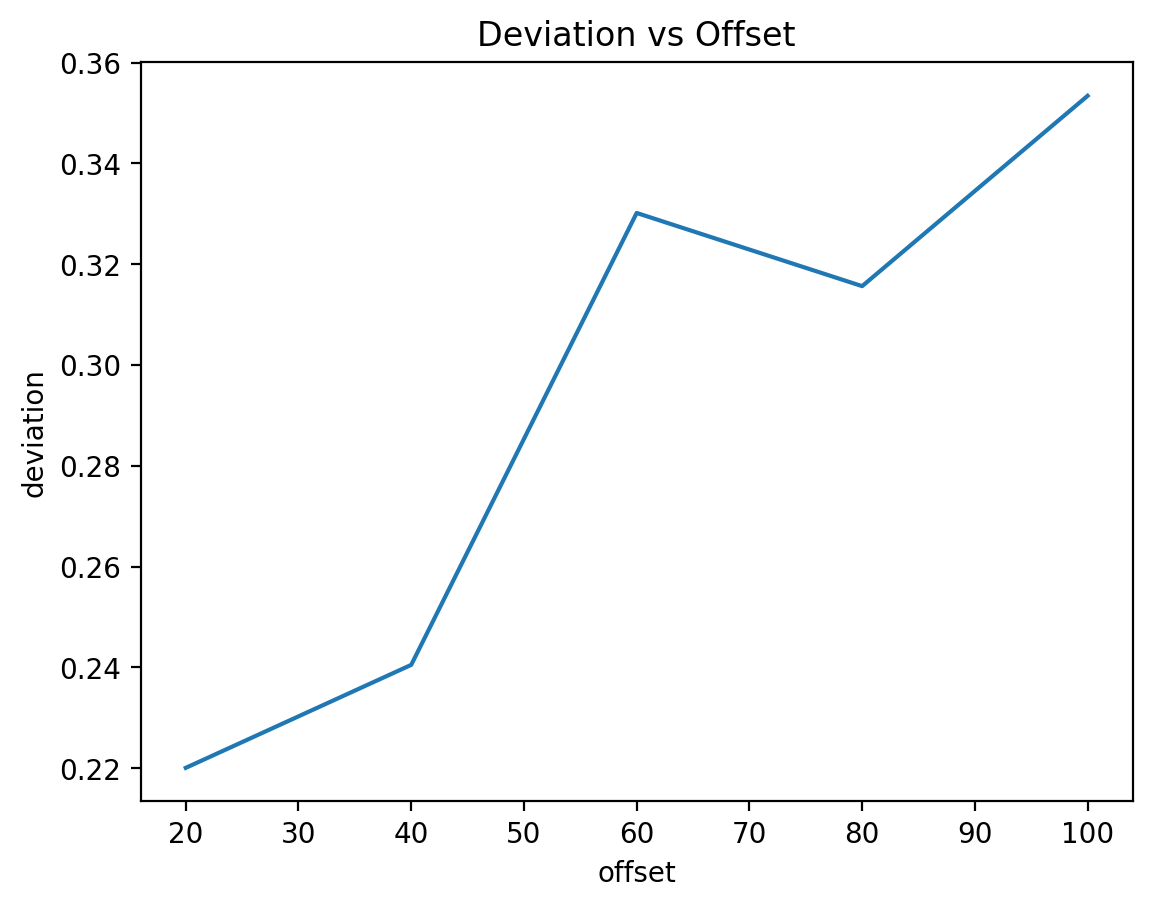

deviation array: [0.22005239774415875, 0.24048887306284206, 0.3301687309298732, 0.3156461263925122, 0.35341084559618646]


In [ ]:
offsets = np.array([20, 40, 60, 80, 100])
deviation_array = []

for n in offsets:
    model, test_data, test_label =trainModel(t_eval, z0, L1, L2, m1, m2, g, windowsize, n)  #creating & training new model
    test_predict = model.predict(test_data)    #predicting future positions using model
    deviation = np.mean((test_label - test_predict)**2) #calculating deviation from true path
    deviation_array.append(deviation)

plt.plot(offsets, deviation_array) #plotting devaition vs offset
plt.xlabel('offset')
plt.ylabel('deviation')
plt.title('Deviation vs Offset')
plt.show()

print(f"deviation array:", deviation_array)

Overall trend is as offset increases the deviation, and hence the model's accuarcy decreases. This is because a greater offset makes the model predict more time steps in the future, decreasing accuracy.

## 4.Repeating for the initial conditions  𝑧0=[𝜋/2,0,𝜋/2,0]  

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - loss: 0.7707 - val_loss: 0.7530
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.7572 - val_loss: 0.7457
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.7441 - val_loss: 0.7374
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.7534 - val_loss: 0.7280
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.7167 - val_loss: 0.7167
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.7311 - val_loss: 0.7031
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.7043 - val_loss: 0.6867
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6791 - val_loss: 0.6673
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.6588 - val_loss: 0.6451
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.6540 - val_loss: 0.6222
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6267 - val_loss: 0.5992
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.5834 - val_loss: 0.5781


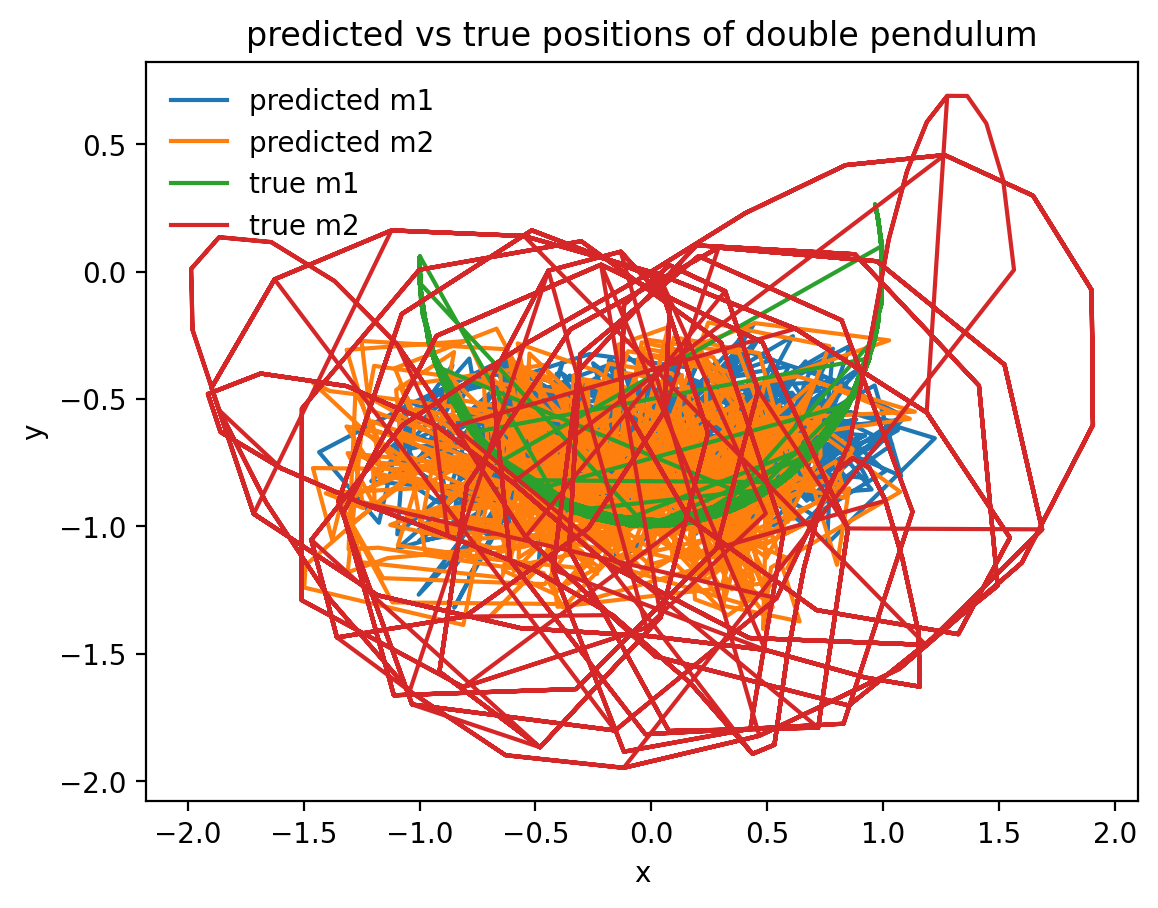

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - loss: 0.7624 - val_loss: 0.7536
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.7594 - val_loss: 0.7460
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.7435 - val_loss: 0.7372
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.7492 - val_loss: 0.7260
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.7346 - val_loss: 0.7108
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7167 - val_loss: 0.6886
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6908 - val_loss: 0.6560
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6566 - val_loss: 0.6163
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.5999 - val_loss: 0.5806
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5704 - val_loss: 0.5505
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.5467 - val_loss: 0.5220
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.5127 - val_loss: 0.5021

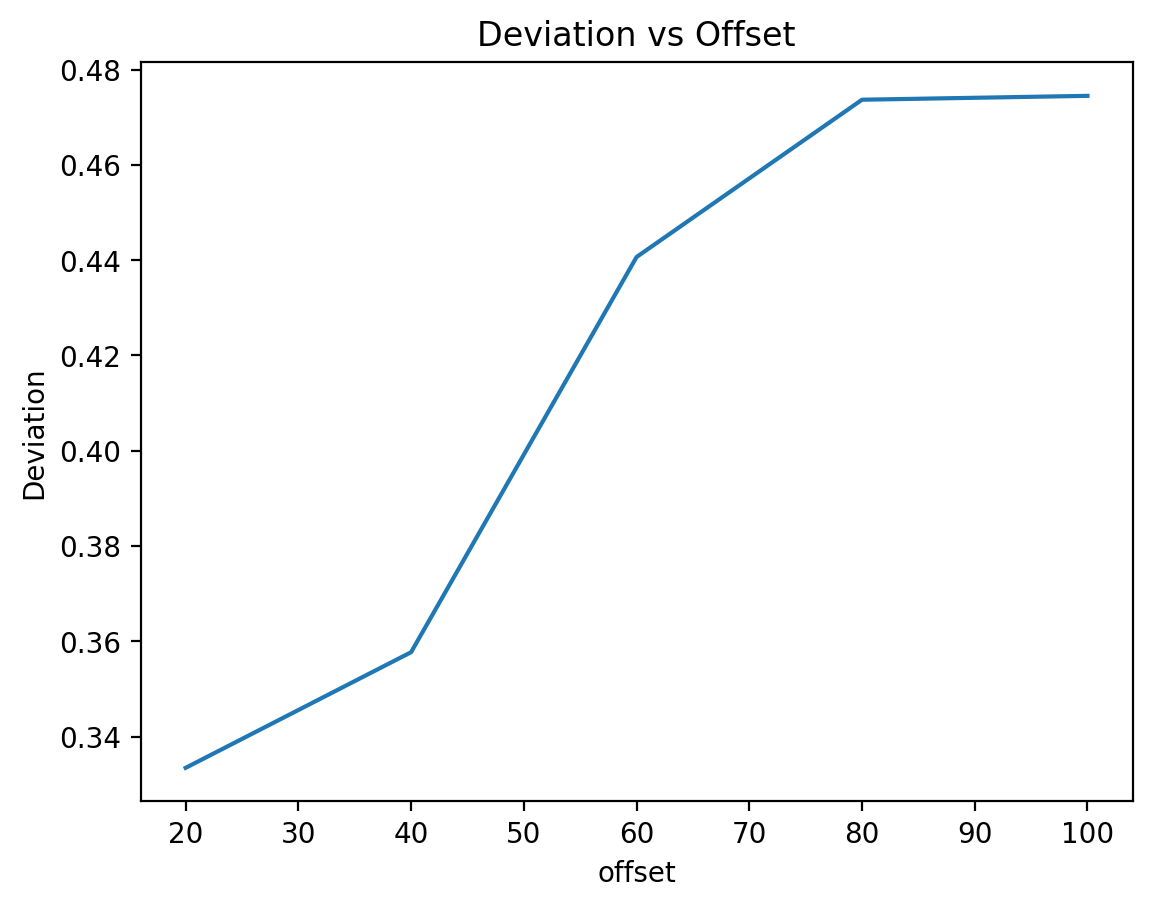

deviation array: [0.33345373010049206, 0.357725731961586, 0.4406619089889012, 0.4736734629834885, 0.4744881250835393]


In [ ]:
#new intial conditions
z0 = np.array([np.pi/2, 0, np.pi/2, 0])
#training new model
model, test_data, test_label = trainModel(t_eval, z0, L1, L2, m1, m2, g, windowsize, offset)
test_predict = model.predict(test_data) #generating predictions using the model
#extracting the predicted paths
predicted_x1 = test_predict[:, :, 0].flatten()
predicted_x2 = test_predict[:, :, 1].flatten()
predicted_y1 = test_predict[:, :, 2].flatten()
predicted_y2 = test_predict[:, :, 3].flatten()
#extracting the actual paths from the test label data
true_x1 = test_label[:, :, 0].flatten()
true_x2 = test_label[:, :, 1].flatten()
true_y1 = test_label[:, :, 2].flatten()
true_y2 = test_label[:, :, 3].flatten()
#plotting results
plt.figure()
plt.plot(predicted_x1, predicted_y1, label='predicted m1')
plt.plot(predicted_x2, predicted_y2, label='predicted m2')
plt.plot(true_x1, true_y1, label='true m1')
plt.plot(true_x2, true_y2, label='true m2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('predicted vs true positions of double pendulum')
plt.legend()
plt.show()

#testing for different offsets
offsets = np.array([20, 40, 60, 80, 100])
deviation_array = []
for n in offsets:
    model, test_data, test_label =trainModel(t_eval, z0, L1, L2, m1, m2, g, windowsize, n)  #creating and training new model
    test_predict = model.predict(test_data)  #predicting future positions using model
    deviation = np.mean((test_label - test_predict)**2)   #calculating deviation from the true path
    deviation_array.append(deviation)
plt.plot(offsets, deviation_array)
plt.xlabel('offset')
plt.ylabel('Deviation')
plt.title('Deviation vs Offset')
plt.show()
print(f"deviation array:", deviation_array)

##5.only training the neural network on the cartesian coordinates of the mass  𝑚2  (i.e without showing the neural network the positions of the mass  𝑚1 )

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 1.9740 - val_loss: 1.9530
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 1.9486 - val_loss: 1.9276
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.9209 - val_loss: 1.8906
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.8811 - val_loss: 1.8439
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.8314 - val_loss: 1.7886
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 1.7808 - val_loss: 1.7307
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.7182 - val_loss: 1.6697
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.6536 - val_loss: 1.6051
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.5913 - val_loss: 1.5397
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 1.5232 - val_loss: 1.4740
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 1.4500 - val_loss: 1.4094
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.3830 - val_loss: 1.3451


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119911 (\N{MATHEMATICAL ITALIC SMALL Z}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120587 (\N{MATHEMATICAL ITALIC SMALL PI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


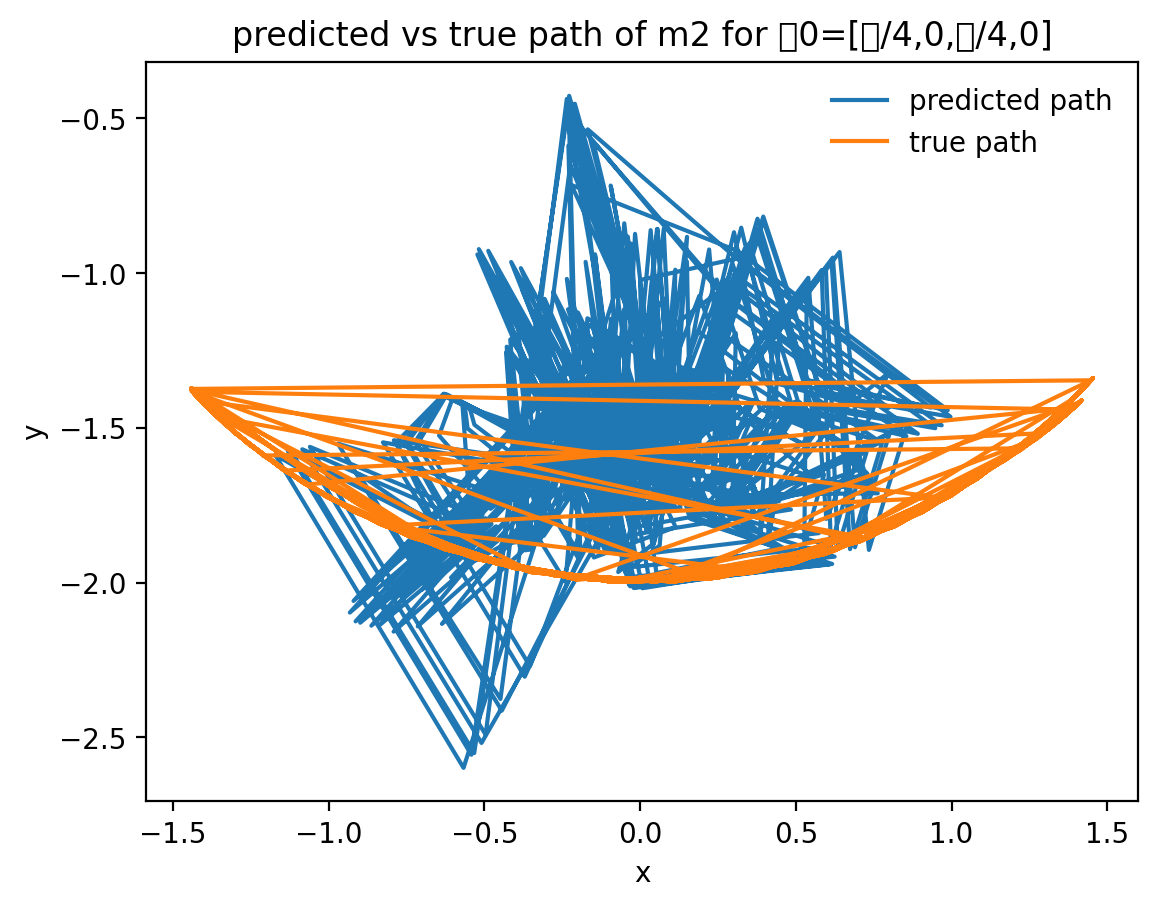

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.9690 - val_loss: 1.0193
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.9536 - val_loss: 1.0091
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.9646 - val_loss: 0.9984
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.9278 - val_loss: 0.9865
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.9469 - val_loss: 0.9722
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.9449 - val_loss: 0.9542
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.9298 - val_loss: 0.9319
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 1.2995 - val_loss: 0.9120
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.8640 - val_loss: 0.9054
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.8577 - val_loss: 0.8953
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.8267 - val_loss: 0.8840
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8589 - val_loss: 0.8722


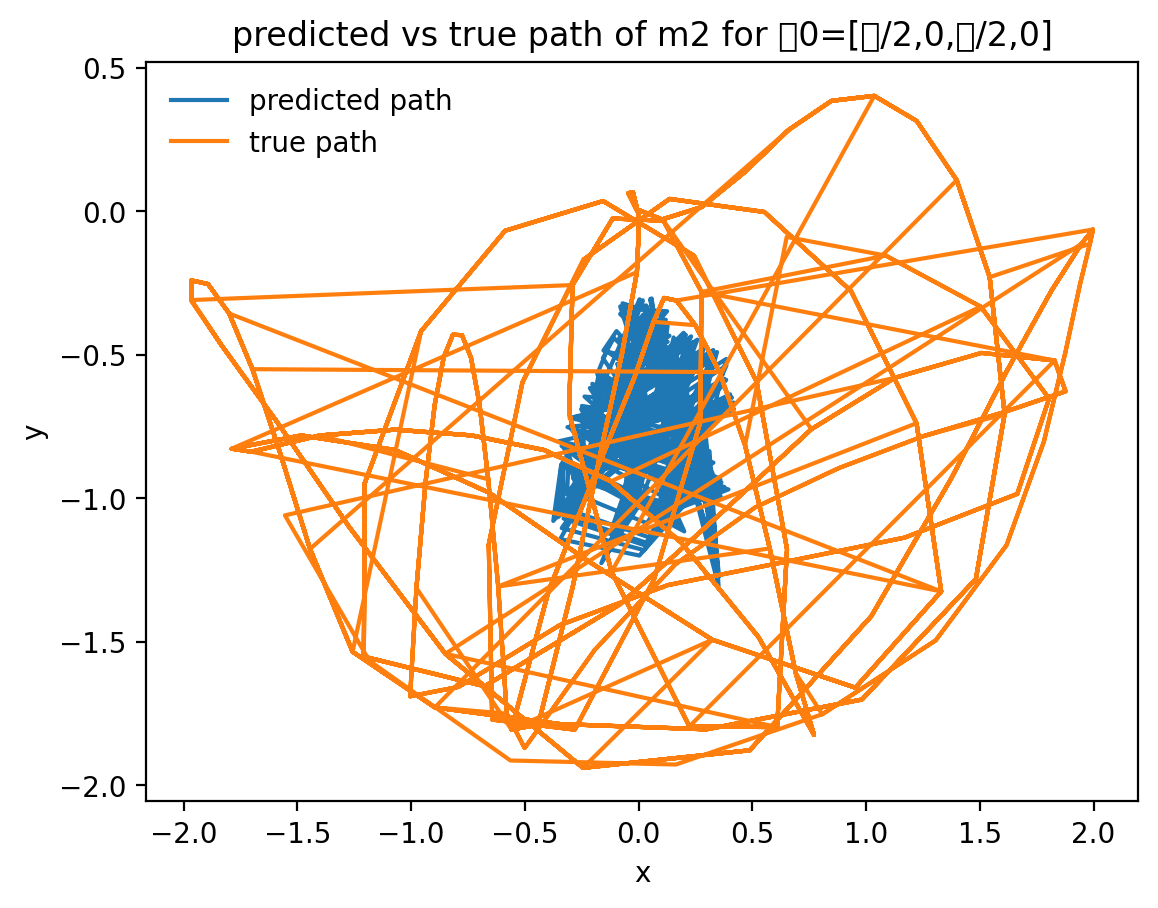

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 1.9891 - val_loss: 1.9548
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 1.9519 - val_loss: 1.9263
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.9266 - val_loss: 1.8947
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 1.8944 - val_loss: 1.8517
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.8534 - val_loss: 1.7981
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 1.8051 - val_loss: 1.7323
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.7371 - val_loss: 1.6348
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 1.6281 - val_loss: 1.5014
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.4951 - val_loss: 1.3855
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 1.3862 - val_loss: 1.2792
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.2737 - val_loss: 1.1696
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.1414 - val_loss: 1.0699


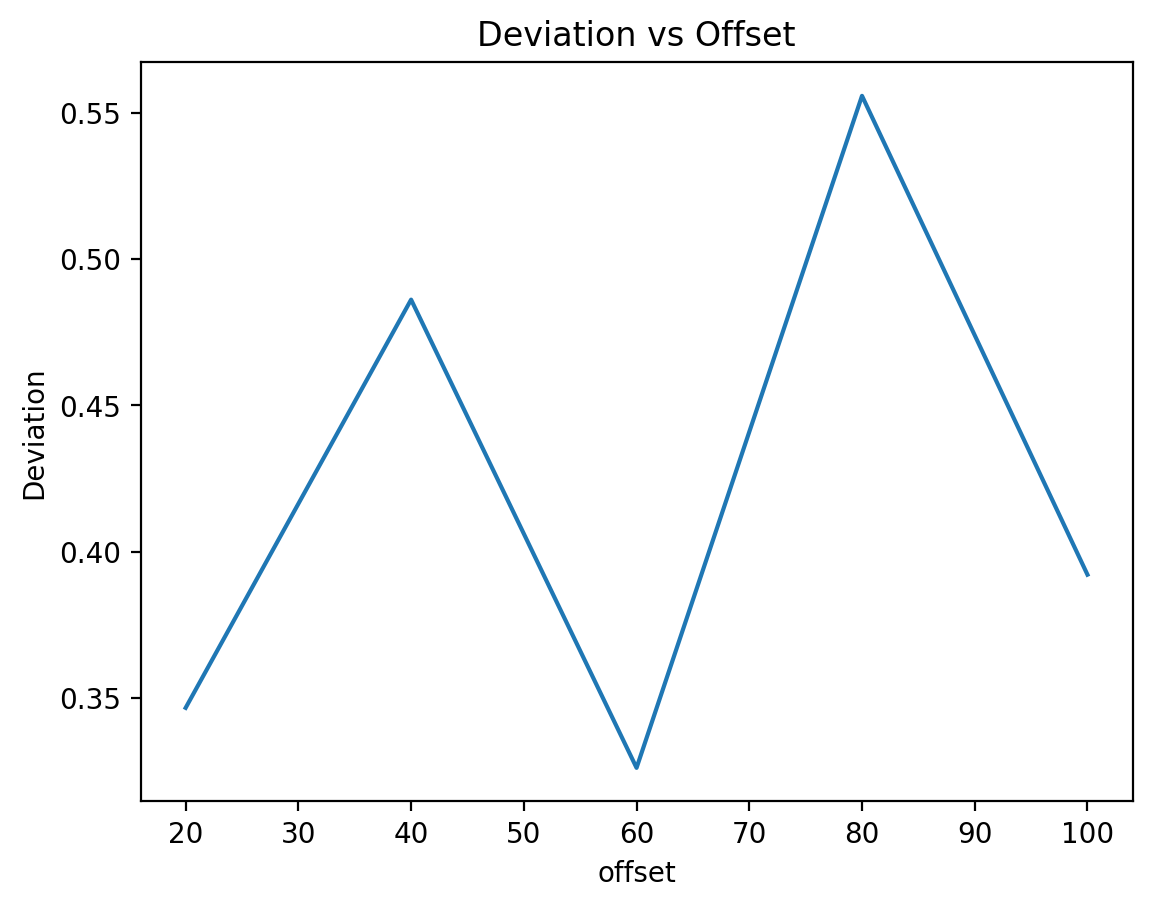

deviation array: [0.3466244207917773, 0.4860782481589792, 0.32612272699746897, 0.5557087350301781, 0.39211617385136804]


In [ ]:
 def trainModelM2(t_eval, z0, L1, m1, g, windowsize, offset):
  #creating train amd test arrays
  x1, y1, x2, y2, vx1, vy1, vx2, vy2 = PenSolve(t_eval, z0, L1, L2, m1, m2, g)    #solving ODE
  x2input, x2label = shapeArray(x2, windowsize, offset)   #creating input & target windows for m2
  y2input, y2label = shapeArray(y2, windowsize, offset)
  input_data = np.zeros((x2input.shape[0], x2input.shape[1], 2))  # #initialising the input array
  input_data[:, :, 0] = x2input #extracting corresponding x,y positions for m2
  input_data[:, :, 1] = y2input
  target_data = np.zeros((x2label.shape[0], x2label.shape[1], 2))   #initialising the target array
  target_data[:, :, 0] = x2label #extracting corresponding x,y positions for m2
  target_data[:, :, 1] = y2label
  #splitting into train and test data
  train_data, test_data, train_label, test_label = train_test_split(input_data, target_data, test_size=0.25, shuffle=True, random_state=42)
  #compliling model
  model = keras.models.Sequential()
  model.add(keras.layers.Input(shape=(None, 2)))  # original input shape =2
  model.add(keras.layers.LSTM(16, return_sequences=True))  # LSTM layer with 16 neurons
  model.add(keras.layers.LSTM(8, activation='relu'))  # output only the last step
  model.add(keras.layers.Dense(2*offset, activation="linear"))  # outputs 4 values per sample * offset
  model.add(layers.Reshape((offset,2)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  #train model
  history=model.fit(train_data,train_label,epochs=30,batch_size=16,verbose=1,validation_data=(test_data,test_label))
  return model, test_data, test_label

#testing model
z0 = [np.pi/4, 0, np.pi/4, 0]
model, test_data, test_label = trainModelM2(t_eval, z0, L2, m2, g, windowsize, offset)
test_predict = model.predict(test_data) #generating predictions using the model
#extracting the predicted paths
predicted_x2 = test_predict[:, :, 0].flatten()
predicted_y2 = test_predict[:, :, 1].flatten()
#extracting the actual paths from the test label data
true_x2 = test_label[:, :, 0].flatten()
true_y2 = test_label[:, :, 1].flatten()
#plotting results
plt.figure()
plt.plot(predicted_x2, predicted_y2, label='predicted path')
plt.plot(true_x2, true_y2, label='true path')
plt.xlabel('x')
plt.ylabel('y')
plt.title('predicted vs true path of m2 for 𝑧0=[𝜋/4,0,𝜋/4,0]')
plt.legend()
plt.show()

#testing for new initial conditions
z0 = [np.pi/2, 0, np.pi/2, 0]
model, test_data, test_label = trainModelM2(t_eval, z0, L2, m2, g, windowsize, offset)
test_predict = model.predict(test_data) #generating predictions using the model
#extracting the predicted paths
predicted_x2 = test_predict[:, :, 0].flatten()
predicted_y2 = test_predict[:, :, 1].flatten()
#extracting the actual paths from the test label data
true_x2 = test_label[:, :, 0].flatten()
true_y2 = test_label[:, :, 1].flatten()
#plotting results
plt.figure()
plt.plot(predicted_x2, predicted_y2, label='predicted path')
plt.plot(true_x2, true_y2, label='true path')
plt.xlabel('x')
plt.ylabel('y')
plt.title('predicted vs true path of m2 for 𝑧0=[𝜋/2,0,𝜋/2,0]')
plt.legend()
plt.show()

z0 = [np.pi/4, 0, np.pi/4, 0]
#testing for different offsets
offsets = np.array([20, 40, 60, 80, 100])
deviation_array = []
for n in offsets:
    model, test_data, test_label =trainModelM2(t_eval, z0, L2, m2, g, windowsize, n)  #creating and training new model
    test_predict = model.predict(test_data)   #predicting future positions using model
    deviation = np.mean((test_label - test_predict)**2)   #calculating the devaition from the true path
    deviation_array.append(deviation)
plt.plot(offsets, deviation_array)  #plotting deviation against offset
plt.xlabel('offset')
plt.ylabel('Deviation')
plt.title('Deviation vs Offset')
plt.show()
print(f"deviation array:", deviation_array)

When training the model over just m2 position it becomes less acurate. This is shown in the plot of predicted vs true postion, where the plot shows random positions that do not follow the expected motion of a pendulum at all. The model gets even more innacurate for the alternate initial condition 𝑧0=[𝜋/2,0,𝜋/2,0]. The deviation is lower than the model trained over both. masses, howveer this is due to the central grouping of positions for the m2 model and does not reflect the overall accauracy of the paths.